<h1>Step 2: Preprocess and analyze data  </h1>

---

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

### Đọc dữ liệu từ file

In [2]:
path = '/content/weatherDaNang.csv'
data = pd.read_csv(path,sep='\t')
data.head(10)

,Date,Weather,Time,Temperature,Forecast,Rain,%Rain,Cloud,Pressure,Wind,Gust
0,"Thursday, 01 January 2009",Moderate or heavy rain shower,00:00,20 °c,20 °c,3.5 mm,100%,100%,1016 mb,22 km/h,34 km/h
1,"Thursday, 01 January 2009",Moderate or heavy rain shower,03:00,20 °c,20 °c,2.0 mm,100%,100%,1016 mb,24 km/h,37 km/h
2,"Thursday, 01 January 2009",Moderate or heavy rain shower,06:00,20 °c,20 °c,2.8 mm,100%,100%,1017 mb,29 km/h,44 km/h
3,"Thursday, 01 January 2009",Heavy rain at times,09:00,20 °c,20 °c,1.3 mm,100%,100%,1018 mb,21 km/h,38 km/h
4,"Thursday, 01 January 2009",Heavy rain at times,12:00,20 °c,20 °c,1.4 mm,100%,100%,1017 mb,19 km/h,36 km/h
5,"Thursday, 01 January 2009",Heavy rain at times,15:00,20 °c,20 °c,1.1 mm,100%,100%,1016 mb,20 km/h,31 km/h
6,"Thursday, 01 January 2009",Heavy rain at times,18:00,20 °c,20 °c,1.4 mm,100%,100%,1017 mb,19 km/h,34 km/h
7,"Thursday, 01 January 2009",Moderate or heavy rain shower,21:00,20 °c,20 °c,1.8 mm,100%,100%,1019 mb,21 km/h,37 km/h
8,"Friday, 02 January 2009",Moderate or heavy rain shower,00:00,21 °c,21 °c,2.3 mm,100%,100%,1018 mb,22 km/h,39 km/h
9,"Friday, 02 January 2009",Moderate or heavy rain shower,03:00,20 °c,20 °c,1.8 mm,100%,100%,1017 mb,23 km/h,41 km/h


In [3]:
data.shape

(46496, 11)

Dữ liệu gồm **46496** dòng và **11** cột. Mỗi dòng bao gồm các thông tin về thời tiết trong 3h:
- Date: ngày
- Weather: tình trạng thời tiết
- Time: thời gian trong ngày
- Temperature: nhiệt độ hiện tại
- Forecast: dự báo nhiệt độ
- Rain: lượng mưa
- %Rain: khả năng có mưa
- Cloud: mật độ mây
- Pressure: áp suất không khí
- Wind: tốc độ gió
- Gust: tốc độ gió giật


### Kiểm tra giá trị thiếu

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46496 entries, 0 to 46495
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         46496 non-null  object
 1   Weather      46496 non-null  object
 2   Time         46496 non-null  object
 3   Temperature  46496 non-null  object
 4   Forecast     46496 non-null  object
 5   Rain         46496 non-null  object
 6   %Rain        46496 non-null  object
 7   Cloud        46496 non-null  object
 8   Pressure     46496 non-null  object
 9   Wind         46496 non-null  object
 10  Gust         46496 non-null  object
dtypes: object(11)
memory usage: 3.9+ MB


-> Dữ liệu không có giá trị thiếu

### Kiểu dữ liệu

Tất cả thuộc tính đều có kiểu dữ liệu object

**Các cột Temperature, Forecast, Rain, %Rain, Cloud, Pressure, Wind, Gust nên được đưa về dạng số**

In [5]:
attrs1 = ['Temperature', 'Forecast', 'Rain', 'Pressure', 'Wind', 'Gust']
for attr in attrs1:
    data[attr] = data[attr].str.split(' ', expand=True)[0].astype('float')

attrs2 = ['%Rain', 'Cloud']
for attr in attrs2:
    data[attr] = data[attr].str.split('%', expand=True)[0].astype('float') / 100

In [6]:
data.dtypes

,0
Date,object
Weather,object
Time,object
Temperature,float64
Forecast,float64
Rain,float64
%Rain,float64
Cloud,float64
Pressure,float64
Wind,float64


### Phân bố của dữ liệu dạng số

In [7]:
data_float = data[['Temperature', 'Forecast', 'Rain', '%Rain', 'Cloud','Pressure', 'Wind', 'Gust']]
data_float.describe()

,Temperature,Forecast,Rain,%Rain,Cloud,Pressure,Wind,Gust
count,46496.000000,46496.000000,46496.000000,46496.000000,46496.000000,46496.00000,46496.000000,46496.000000
mean,25.421735,28.372634,0.373940,0.360266,0.532312,1010.63057,9.644701,16.542541
std,3.605045,5.452304,1.219315,0.474893,0.323212,4.91862,4.685857,7.430709
min,14.000000,14.000000,0.000000,0.000000,0.000000,976.00000,0.000000,0.000000
25%,23.000000,25.000000,0.000000,0.000000,0.210000,1007.00000,6.000000,12.000000
50%,25.000000,28.000000,0.000000,0.000000,0.550000,1010.00000,9.000000,16.000000
75%,28.000000,32.000000,0.200000,1.000000,0.820000,1014.00000,12.000000,20.000000
max,37.000000,51.000000,35.200000,1.000000,1.000000,1028.00000,62.000000,110.000000



**count:** Số lượng giá trị (non-null) trong mỗi cột.

**mean:** Giá trị trung bình.

**std:** Độ lệch chuẩn, cho biết mức độ biến động của dữ liệu.

**min:** Giá trị nhỏ nhất.

**25%:** Phần tư đầu tiên, là giá trị dưới 25% số dữ liệu.

**50%:** Phần tư thứ hai, là giá trị dưới 50% số dữ liệu.

**75%:** Phần tư thứ ba, là giá trị dưới 75% số dữ liệu.

**max:** Giá trị lớn nhất.




In [8]:
import matplotlib.pyplot as plt

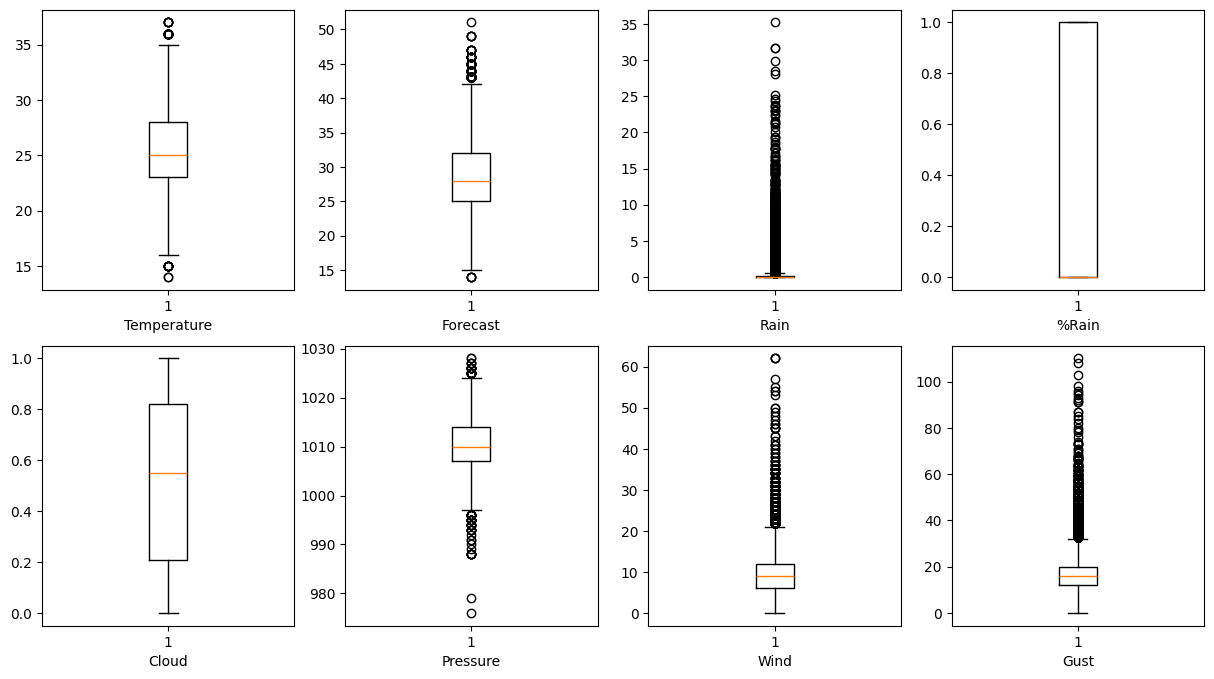

In [9]:
fig, axs = plt.subplots(2, 4, figsize=(15, 8))

axs[0, 0].boxplot(data['Temperature'])
axs[0, 0].set_xlabel('Temperature')

axs[0, 1].boxplot(data['Forecast'])
axs[0, 1].set_xlabel('Forecast')

axs[0, 2].boxplot(data['Rain'])
axs[0, 2].set_xlabel('Rain')

axs[0, 3].boxplot(data['%Rain'])
axs[0, 3].set_xlabel('%Rain')

axs[1, 0].boxplot(data['Cloud'])
axs[1, 0].set_xlabel('Cloud')

axs[1, 1].boxplot(data['Pressure'])
axs[1, 1].set_xlabel('Pressure')

axs[1, 2].boxplot(data['Wind'])
axs[1, 2].set_xlabel('Wind')

axs[1, 3].boxplot(data['Gust'])
axs[1, 3].set_xlabel('Gust')

plt.show()

### Phân bố của dữ liệu không phải số








In [ ]:
# print(data['Weather'].unique())

['Moderate or heavy rain shower' 'Heavy rain at times'
 'Moderate rain at times' 'Patchy rain possible' 'Overcast' 'Cloudy'
 'Partly cloudy' 'Clear' 'Light rain shower' 'Light drizzle' 'Mist'
 'Thundery outbreaks possible' 'Patchy light drizzle' 'Patchy light rain'
 'Moderate rain' 'Light rain' 'Heavy rain'
 'Patchy light rain with thunder']


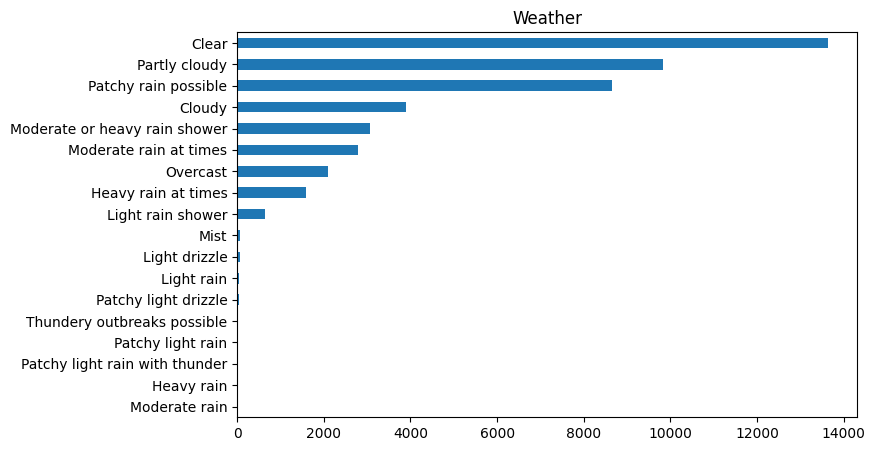

In [10]:
# Weather
dic_weather = {}
for weather in data['Weather'].unique():
    dic_weather[weather] = data[data['Weather'] == weather].shape[0]

data_weather = pd.Series(dict(sorted(dic_weather.items(), key=lambda item: item[1])))
plot_weather = data_weather.plot(kind = 'barh', figsize=(8,5), title='Weather')

Gộp các giá trị của **Weather** thành các giá trị: *Rain, Overcast, Cloudy,  Clear, Mist*

In [11]:
def convert_weather(x):
    if ('rain' in x) or ('drizzle' in x) or ('Thundery' in x):
        return 'Rain'
    if x == 'Partly cloudy':
        return 'Cloudy'
    return x

data['Weather'] = data['Weather'].apply(convert_weather)
data['Weather'].unique()

array(['Rain', 'Overcast', 'Cloudy', 'Clear', 'Mist'], dtype=object)

**Dữ liệu sau khi tiền xử lý**

In [12]:
data.head(30)

,Date,Weather,Time,Temperature,Forecast,Rain,%Rain,Cloud,Pressure,Wind,Gust
0,"Thursday, 01 January 2009",Rain,00:00,20.0,20.0,3.5,1.0,1.00,1016.0,22.0,34.0
1,"Thursday, 01 January 2009",Rain,03:00,20.0,20.0,2.0,1.0,1.00,1016.0,24.0,37.0
2,"Thursday, 01 January 2009",Rain,06:00,20.0,20.0,2.8,1.0,1.00,1017.0,29.0,44.0
3,"Thursday, 01 January 2009",Rain,09:00,20.0,20.0,1.3,1.0,1.00,1018.0,21.0,38.0
4,"Thursday, 01 January 2009",Rain,12:00,20.0,20.0,1.4,1.0,1.00,1017.0,19.0,36.0
5,"Thursday, 01 January 2009",Rain,15:00,20.0,20.0,1.1,1.0,1.00,1016.0,20.0,31.0
6,"Thursday, 01 January 2009",Rain,18:00,20.0,20.0,1.4,1.0,1.00,1017.0,19.0,34.0
7,"Thursday, 01 January 2009",Rain,21:00,20.0,20.0,1.8,1.0,1.00,1019.0,21.0,37.0
8,"Friday, 02 January 2009",Rain,00:00,21.0,21.0,2.3,1.0,1.00,1018.0,22.0,39.0
9,"Friday, 02 January 2009",Rain,03:00,20.0,20.0,1.8,1.0,1.00,1017.0,23.0,41.0


**Ghi vào file csv**

In [13]:
data.to_csv('weatherDaNang_preprocessed.csv', sep='\t', index=False)

### Đặt câu hỏi

***Tháng nào trong năm có nhiệt độ trung bình cao nhất?***

**Tiền xử lý dữ liệu**

In [ ]:
data['Month'] = data['Date'].str.split(' ', expand=True)[2]
data['Month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

**Phân tích dữ liệu để trả lời câu hỏi**

Tháng có nhiệt độ trung bình cao nhất là June


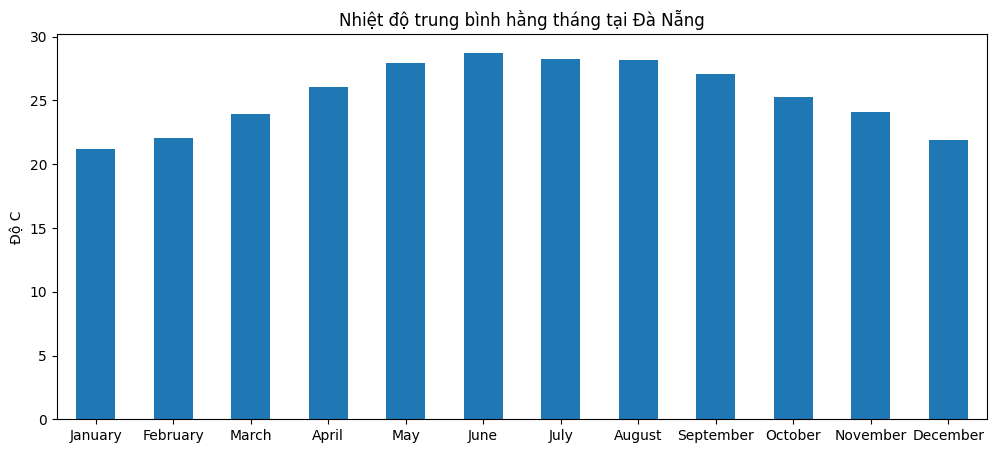

In [ ]:
dic = {}

for month in data['Month'].unique():
    dic[month] = data[data['Month'] == month]['Temperature'].mean()

mean_temp_of_months = pd.Series(dic)

highest_temp_month = mean_temp_of_months.idxmax()
print('Tháng có nhiệt độ trung bình cao nhất là', highest_temp_month)

temp_plot = mean_temp_of_months.plot(kind='bar', figsize=(12, 5), title='Nhiệt độ trung bình hằng tháng tại Đà Nẵng')
temp_plot.set_ylabel('Độ C')
plt.xticks(rotation=0)
plt.show()

-> Nhiệt độ trung bình cao nhất là vào tháng 6.

***Tháng nào trong năm có lượng mưa thấp nhất?***

**Phân tích dữ liệu để trả lời câu hỏi**

Tháng có lượng mưa thấp nhất là February


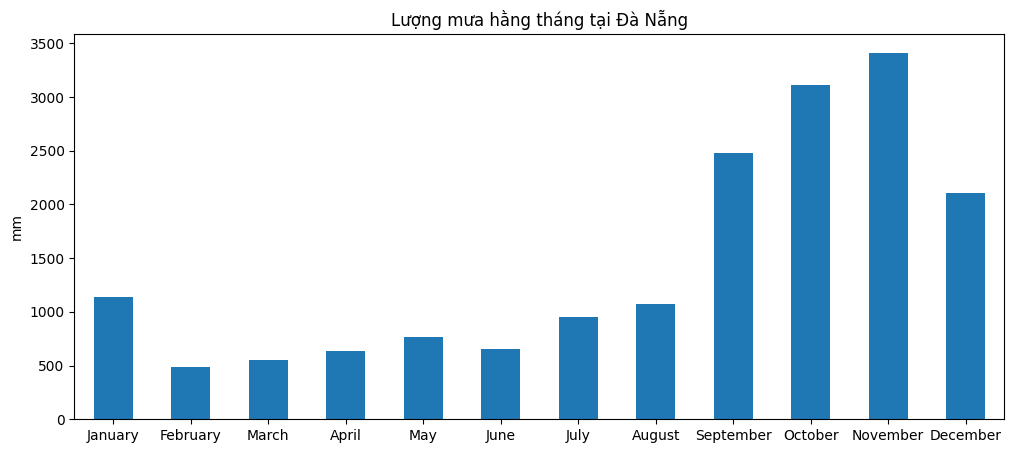

In [ ]:
dic = {}

for month in data['Month'].unique():
    dic[month] = data[data['Month'] == month]['Rain'].sum()

rain_of_months = pd.Series(dic)

driest_month = rain_of_months.idxmin()
print('Tháng có lượng mưa thấp nhất là', driest_month)

temp_plot = rain_of_months.plot(kind='bar', figsize=(12, 5), title='Lượng mưa hằng tháng tại Đà Nẵng')
temp_plot.set_ylabel('mm')
plt.xticks(rotation=0)
plt.show()

-> Lượng mưa của tháng 2 thấp nhất trong năm